# Projeto e Análise de Algoritmos
## Avaliação Teórica de Algoritmos


Plot Matrix

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_matrix(graph):
    data = graph
    dim = len(data)
    fig, ax = plt.subplots(figsize=(dim, dim))
    
    ax.matshow(data, cmap='binary_r',  interpolation='nearest')
    
    for (i, j), z in np.ndenumerate(data):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    plt.show()

### Floyd Warshall Algorithm

In [2]:
def floyd_warshall(graph):
    dist = graph
    # Number of vertices in the graph 
    V = len(graph)

    for k in range(V): 
        for i in range(V): 
            for j in range(V):
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
    return dist

### Dijkstra Algorithm

In [3]:
def min_distance(dist, queue):
    min_dist = float('inf')
    min_index = -1
    
    # from the dist array,pick one which 
    # has min value and is till in queue 
    for i in range(len(dist)): 
        if dist[i] < min_dist and i in queue: 
            min_dist = dist[i] 
            min_index = i 
            
    return min_index 

In [4]:
def dijkstra(source, graph): 
    V = len(graph)
    dist = [float('inf')] * V
    dist[source] = 0
    
    short_path = [-1] * V
    
    queue = [] 
    for i in range(V): 
        queue.append(i)
            
    #Find shortest path for all vertices 
    while queue: 

        # Pick the minimum dist vertex  
        # from the set of vertices 
        # still in queue 
        u = min_distance(dist,queue)  
        
        # remove min element
        try:
            queue.remove(u)
        except:
            break

        # Update dist value and parent  
        # index of the adjacent vertices of 
        # the picked vertex. Consider only  
        # those vertices which are still in 
        # queue 
        for i in range(V): 
            '''Update dist[i] only if it is in queue, there is 
            an edge from u to i, and total weight of path from 
            src to i through u is smaller than current value of 
            dist[i]'''
            if graph[u][i] and i in queue: 
                if dist[u] + graph[u][i] < dist[i]: 
                    dist[i] = dist[u] + graph[u][i] 
                    short_path[i] = u                        
    return dist

In [5]:
def n_djikstra(graph):
    dist_graph = list()
    for i in range(len(graph)):
        dist_graph.append(dijkstra(i, graph))

    return dist_graph

In [6]:
from collections import defaultdict
from heapq import *

def heap_dijkstra(edges, source, t):
    graph = defaultdict(list)
    for l,r,c in edges:
        graph[l].append((c,r))

    queue, visitados, mins = [(0, source, ())], set(), {source: 0}
    
    while queue:
        (cost,v1,path) = heappop(queue)
        if v1 not in visitados:
            visitados.add(v1)
            path = (v1, path)
            if v1 == t:
                return (cost, path)

            for c, v2 in graph.get(v1, ()):
                if v2 in visitados: continue
                prev = mins.get(v2, None)
                next = cost + c
                if prev is None or next < prev:
                    mins[v2] = next
                    heappush(queue, (next, v2, path))

    return float('inf')

In [7]:
def n_heap_djikstra(graph, edges, edges_list):
    g = graph

    for e in edges_list:
        u, v = e[0], e[1]
        min_dist = heap_dijkstra(edges, u, v)
        if(min_dist == 'inf'):
            g[u][v] = float('inf')
        else:
            g[u][v] = min_dist[0]
            
    return g

### Exemplo de execução

In [11]:
import itertools as it

INF = float('inf')

graph = [
    [0,   5,    INF,  10], 
    [INF, 0,    3,    INF], 
    [INF, INF,  0,    1], 
    [INF, INF,  INF,  0] 
] 

vertices = [v for v in range(len(graph))]
edges_list = list(it.combinations(vertices, 2))

edges = list()
for e in edges_list:
    u, v = e[0], e[1]
    edges.append([e[0], e[1], graph[u][v]])
        
floyd_warshall_graph = floyd_warshall(graph)
n_djikstra_graph = n_djikstra(graph)
n_heap_djikstra_graph = n_heap_djikstra(graph, edges, edges_list)

In [12]:
floyd_warshall_graph == n_djikstra_graph == n_heap_djikstra_graph

True

## Análise

### Execução

In [ ]:
import random
import time
from datetime import datetime
import numpy as np
import math

# estrutura dos dados
size_time_data = list()
cols = ['size', 'floyd_time', 'djikstra_time']

# semente aleatoria
np.random.seed(42)

# menor valor numero de vertices
N = 1
# maior valor numero de vertices
M = 100

for i in range(N, M):
    
    # gera um grafo de n vertices
    graph = np.random.randint(i*5, size=(i*5, i*5))

    # atribui a diagonal, valores iguais a 0
    np.fill_diagonal(graph, 0)

    # floyd
    start_floyd = time.time()
    floyd_warshall(graph)
    end_floyd = time.time()

    delta_time_floyd = end_floyd - start_floyd

    # djikstra
    vertices = [v for v in range(len(graph))]
    edges_list = list(it.combinations(vertices, 2))

    edges = list()
    for e in edges_list:
        u, v = e[0], e[1]
        edges.append([e[0], e[1], graph[u][v]])
        
    start_djikstra = time.time()
    #n_djikstra(graph)
    n_heap_djikstra(graph, edges, edges_list)
    end_djikstra = time.time()

    delta_time_djikstra = end_djikstra - start_djikstra

    size_time_data.append([i*5, delta_time_floyd, delta_time_djikstra])

    print(str([i*5, delta_time_floyd, delta_time_djikstra]))

[5, 0.005738973617553711, 0.0005354881286621094]
[10, 0.014850616455078125, 0.008111238479614258]
[15, 0.03851461410522461, 0.025834321975708008]
[20, 0.11403346061706543, 0.06477999687194824]
[25, 0.18230700492858887, 0.15797972679138184]
[30, 0.3282310962677002, 0.29348182678222656]
[35, 0.48673129081726074, 0.6481366157531738]
[40, 1.0192885398864746, 1.194965124130249]
[45, 1.4620246887207031, 1.4599254131317139]
[50, 1.5205903053283691, 2.5079686641693115]
[55, 2.460294723510742, 2.2199900150299072]
[60, 2.0620203018188477, 5.231433868408203]
[65, 2.263664484024048, 5.398761510848999]
[70, 3.657304525375366, 8.639175415039062]


In [39]:
df_fl_dj = pd.DataFrame(size_time_data, columns=cols)

df_fl_dj.to_csv('time_execution_['+str(N)+' - '+str(M)+'].csv')
df_fl_dj.to_html('time_execution_['+str(N)+' - '+str(M)+'].html')

### Exibição dos dados

In [40]:
import pandas as pd

In [46]:
df = pd.read_csv('time_execution_[1 - 1000].csv', index_col=0)

In [48]:
df.sample(7).sort_values(by='size')

,size,floyd_time,djikstra_time
2,15,0.005324,0.005821
15,80,0.759325,0.501895
69,350,62.287240,37.128076
81,410,101.761844,61.924997
108,540,220.564248,140.983247
139,695,473.683687,303.121008
160,800,729.649359,443.086357


In [49]:
df_fl_dj = df

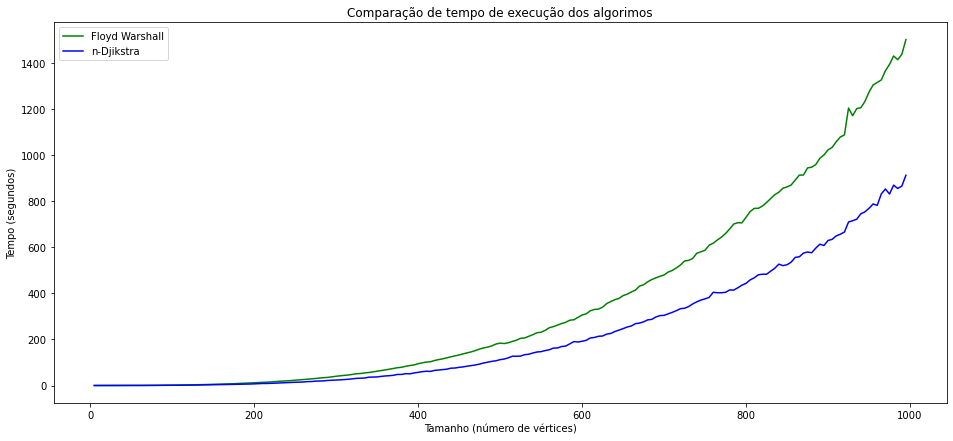

In [50]:
import matplotlib.pyplot as plt
from math import log
import numpy as np

plt.figure(figsize=(16,7))

plt.title('Comparação de tempo de execução dos algorimos')

plt.plot(df_fl_dj['size'], df_fl_dj['floyd_time'], 
        color='green', linestyle='solid')

plt.plot(df_fl_dj['size'], df_fl_dj['djikstra_time'], 
        color='blue', linestyle='solid')


plt.xlabel('Tamanho (número de vértices)')
plt.ylabel('Tempo (segundos)')

plt.legend(['Floyd Warshall', 'n-Djikstra'])

plt.savefig('fld-dkt-t(n)-1-1000.png')
plt.show()

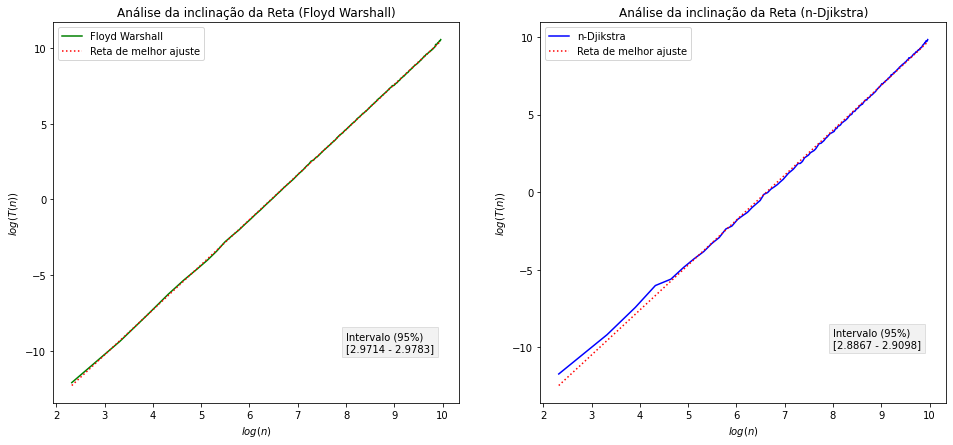

In [51]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from math import log
import numpy as np
import statsmodels.api as sm


lx = np.log2(df_fl_dj['size'])

lyd = np.log2(df_fl_dj['djikstra_time'])
lyf = np.log2(df_fl_dj['floyd_time'])

f_model = LinearRegression().fit(lx.values.reshape(-1,1), lyf.values)
d_model = LinearRegression().fit(lx.values.reshape(-1,1), lyd.values)

# Intervalo de confiabilidade
lx_stat = sm.add_constant(lx)
res_d = sm.OLS(lyd, lx_stat).fit()
res_f = sm.OLS(lyf, lx_stat).fit()

plt.figure(figsize=(16,7))

plt.subplot(121)

plt.title('Análise da inclinação da Reta (Floyd Warshall)')
plt.plot(lx, lyf, color='green', linestyle='solid')
plt.plot(lx, f_model.intercept_ + f_model.coef_ * lx, color='red', linestyle='dotted')

plt.xlabel('$log(n)$')
plt.ylabel('$log(T(n))$')

plt.legend(['Floyd Warshall', 'Reta de melhor ajuste'])
plt.text(8,-10, 'Intervalo (95%)\n['  + str('{:.4f}'.format(res_f.conf_int(0.05)[0][1])) + ' - ' 
                                + str('{:.4f}'.format(res_f.conf_int(0.05)[1][1])) + ']', 
         bbox=dict(facecolor='grey', alpha=0.1))

###

plt.subplot(122)

plt.title('Análise da inclinação da Reta (n-Djikstra)')
plt.plot(lx, lyd, color='blue', linestyle='solid')
plt.plot(lx, d_model.intercept_ + d_model.coef_ * lx, color='red', linestyle='dotted')

plt.xlabel('$log(n)$')
plt.ylabel('$log(T(n))$')

plt.legend(['n-Djikstra', 'Reta de melhor ajuste'])
plt.text(8,-10, 'Intervalo (95%)\n['  + str('{:.4f}'.format(res_d.conf_int(0.05)[0][1])) + ' - ' 
                                + str('{:.4f}'.format(res_d.conf_int(0.05)[1][1])) + ']', 
         bbox=dict(facecolor='grey', alpha=0.1))


plt.savefig('fld-dkt-slope-1-1000.png')
plt.show()